In [1]:
%matplotlib inline 
import numpy as np

import arrayfire as af

In [14]:
af.info()

## Creating Variables to test the activation functions

In [2]:
x_1D = np.arange(-4, 4,0.01, dtype=np.float32)

# Loading Scipy image function to load image into the a 3D array
from scipy import ndimage

x_3D = np.asarray(ndimage.imread('./LearnAF/test.jpg'), dtype=np.float32)

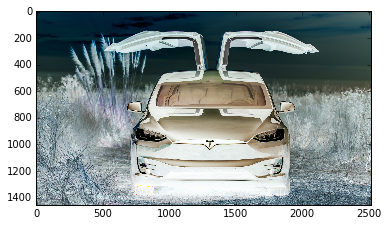

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_3D)
plt.show()

# Linear Activation

In [6]:
def linear(x):
    return x

Testing Linear Activation

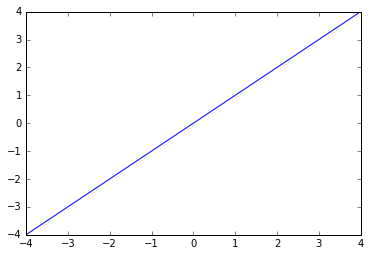

In [25]:
x = af.np_to_af_array(x_1D)
new_x = linear(x)
plt.plot(x,new_x)
plt.show()

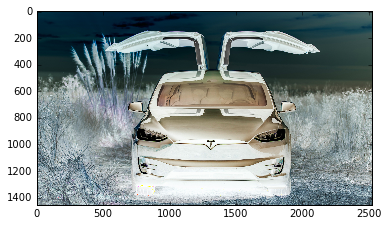

In [9]:
x = af.np_to_af_array(x_3D)
new_x = linear(x)
plt.imshow(new_x)
plt.show()

# Sigmoid Activation

In [10]:
def sigmoid(x):
    return af.arith.sigmoid(x)

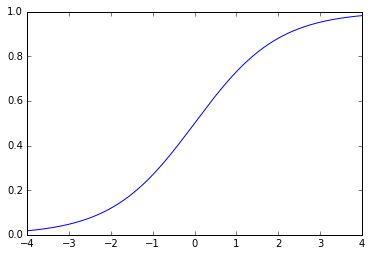

In [24]:
x = af.np_to_af_array(x_1D)
new_x = sigmoid(x)
plt.plot(x,new_x)
plt.show()

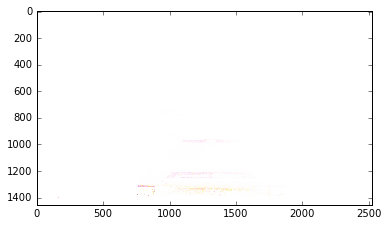

In [20]:
x = af.np_to_af_array(x_3D)
new_x = sigmoid(x)
plt.imshow(new_x)
plt.show()

# tanh Activation

In [21]:
def tanh(x):
    return af.arith.tanh(x)

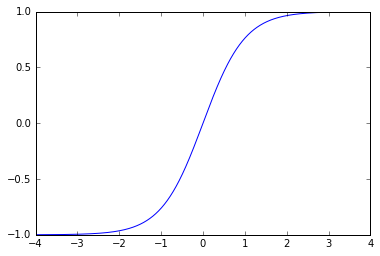

In [23]:
x = af.np_to_af_array(x_1D)
new_x = tanh(x)
plt.plot(x,new_x)
plt.show()

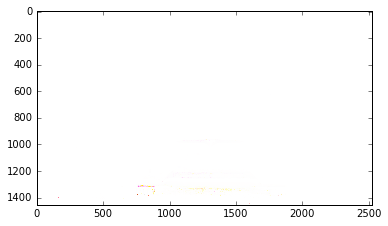

In [26]:
x = af.np_to_af_array(x_3D)
new_x = tanh(x)
plt.imshow(new_x)
plt.show()

# Relu

In [33]:
def relu(x):
    cond = af.Array(x > 0,dtype=af.Dtype.f32)
    return cond * x

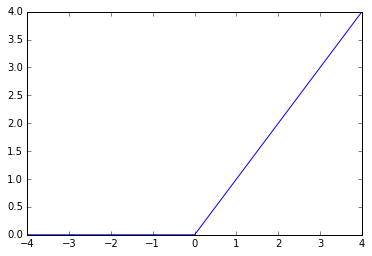

In [34]:
x = af.np_to_af_array(x_1D)
new_x = relu(x)
plt.plot(x,new_x)
plt.show()

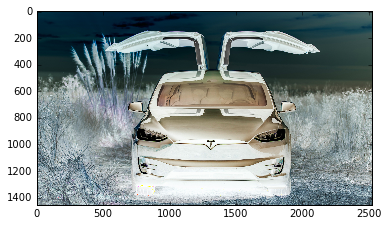

In [37]:
x = af.np_to_af_array(x_3D)
new_x = relu(x)
plt.imshow(new_x)
plt.show()

In [48]:
x_sum = af.algorithm.max(new_x,dim=0)
x_sum = af.algorithm.max(x_sum,dim=1)

In [3]:
def softmax(x):
    exp_ = af.arith.exp(x) - af.algorithm.max(x)
    sum_ = af.arith.sum(exp_)
    return exp_ / sum_

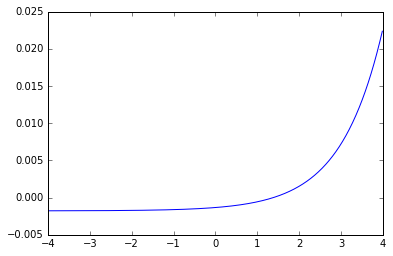

In [10]:
x = af.np_to_af_array(x_1D)
new_x = softmax(x)
plt.plot(x,new_x)
plt.show()

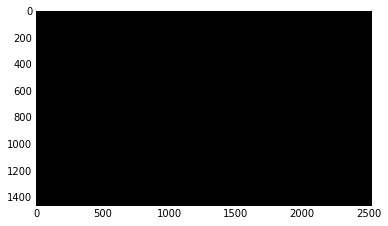

In [18]:
x = af.np_to_af_array(x_3D)
new_x = softmax(x/255)
plt.imshow(new_x)
plt.show()

In [22]:
new_x[10:15,10:15,1]

arrayfire.Array()
Type: float
[5 5 1 1]
    0.0000     0.0000     0.0000     0.0000     0.0000 
    0.0000     0.0000     0.0000     0.0000     0.0000 
    0.0000     0.0000     0.0000     0.0000     0.0000 
    0.0000     0.0000     0.0000     0.0000     0.0000 
    0.0000     0.0000     0.0000     0.0000     0.0000 


In [97]:
import theano as t

t.tensor.sum(np.asarray(x), axis=-1, keepdims=True)

DimShuffle{0,1,x}.0

In [104]:
x1 = np.asarray(x) * np.asarray(x) 
x1 = t.tensor.ftensor3('x1')

In [17]:
x_3D[1,1,1]

204.0